In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr

# List for LQ45's Banking Sector
banking_list = ['BBCA.JK', 'BBNI.JK', 'BBRI.JK', 
             'BBTN.JK', 'BMRI.JK', 'BRIS.JK']
# Set up End and Start times for data
start = '2020-03-11'
end = '2024-03-11'

for stock in banking_list:
    globals()[stock] = yf.download(stock, start, end)

company_list = []
company_name = ["BBCA", "BBNI", "BBRI", 
                "BBTN", "BMRI", "BRIS"]

for ticker, com_name in zip(banking_list, company_name):
    data = yf.download(ticker, start=start, end=end)
    data["Company Name"] = com_name
    company_list.append(data)

df = pd.concat(company_list)
df.tail(10)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Company Name
Date,,,,,,,
2024-02-26,2450.0,2470.0,2420.0,2430.0,2430.0,21265000,BRIS
2024-02-27,2420.0,2550.0,2400.0,2510.0,2510.0,53285600,BRIS
2024-02-28,2530.0,2540.0,2470.0,2480.0,2480.0,29185500,BRIS
2024-02-29,2490.0,2520.0,2430.0,2470.0,2470.0,23360100,BRIS
2024-03-01,2470.0,2480.0,2370.0,2420.0,2420.0,27762600,BRIS
2024-03-04,2420.0,2450.0,2380.0,2410.0,2410.0,22411600,BRIS
2024-03-05,2410.0,2450.0,2410.0,2430.0,2430.0,18420700,BRIS
2024-03-06,2430.0,2480.0,2400.0,2470.0,2470.0,25245100,BRIS
2024-03-07,2500.0,2520.0,2470.0,2480.0,2480.0,31395800,BRIS


In [13]:
# Loop through each company's data
for company in company_list:
    # Calculate summary statistics for the stock data of the current company
    summary_stats = company.describe()
    
    # Print the company name
    print(f"Company: {company['Company Name'].iloc[0]}") #iloc[0] -> to access first data
    
    # Print the summary statistics
    print(summary_stats)
    print("\n")

Company: BBCA
               Open          High           Low         Close    Adj Close  \
count    971.000000    971.000000    971.000000    971.000000   971.000000   
mean    7560.355304   7629.953656   7489.325438   7559.428424  7153.828009   
std     1290.927483   1285.882072   1300.844089   1295.605959  1373.975919   
min     4450.000000   4800.000000   4325.000000   4430.000000  3992.931641   
25%     6450.000000   6487.500000   6367.500000   6422.500000  5959.618164   
50%     7575.000000   7625.000000   7475.000000   7575.000000  7134.316406   
75%     8775.000000   8850.000000   8712.500000   8762.500000  8417.015625   
max    10250.000000  10300.000000  10125.000000  10150.000000  9921.374023   

             Volume  
count  9.710000e+02  
mean   8.893857e+07  
std    5.722027e+07  
min    0.000000e+00  
25%    5.766640e+07  
50%    7.558550e+07  
75%    1.044782e+08  
max    7.228279e+08  


Company: BBNI
              Open         High          Low        Close    Adj Clos

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


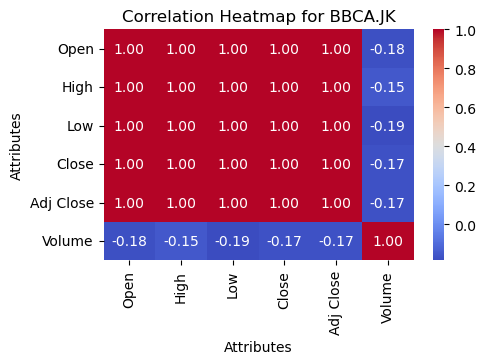

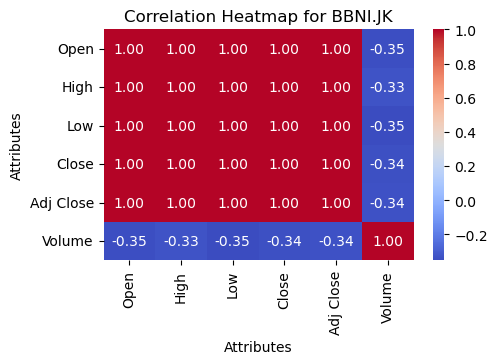

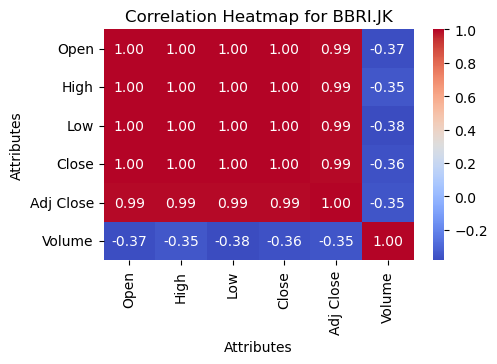

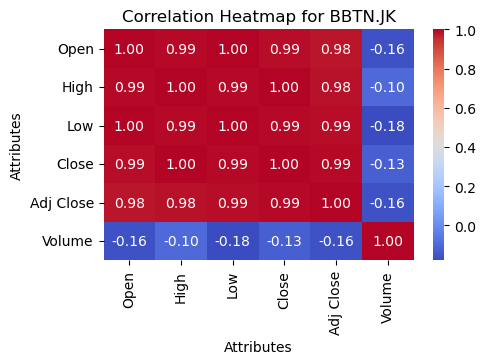

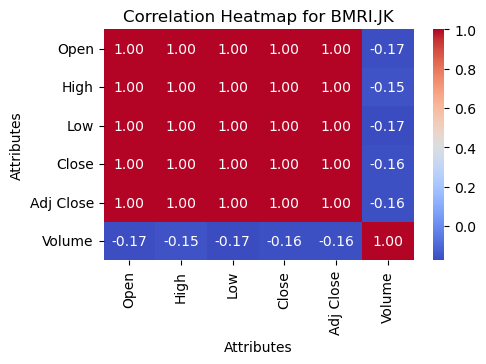

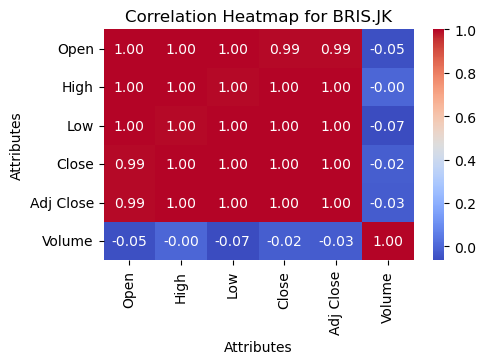

In [14]:
# Fetch data for each stock symbol and store it in a dictionary
stock_data = {}
for stock in banking_list:
    stock_data[stock] = yf.download(stock, start, end)

# Plot correlation heatmap for each stock symbol
for stock, data in stock_data.items():
    # Calculate correlation matrix for the current stock's attributes
    correlation_matrix = data.corr()

    # Plot heatmap
    plt.figure(figsize=(5, 3))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {stock}')
    plt.xlabel('Attributes')
    plt.ylabel('Attributes')
    plt.show()